In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import layout_engine as le

In [2]:
def ruleOf3std(series : pd.Series):
    std = series.std()
    mean = series.mean()
    #range = [mean - 3*std, mean + 3*std] # not usable
    mask = series < (std * 3 + mean)
    return series[mask]

In [3]:
path = r'sp500.csv'
data = pd.read_csv(path)

In [4]:
data.head(10)

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Co.,Industrials,141.14,2.12,20.33,6.900,26.668,107.15,143.37,92.345,8.1210,2.95,5.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,39.60,1.82,25.93,1.529,15.573,32.70,40.49,59.477,4.3590,2.74,2.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie Inc.,Health Care,53.95,3.02,20.87,2.570,2.954,40.10,54.78,85.784,7.1900,4.48,18.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ACN,Accenture,Information Technology,79.79,2.34,19.53,4.068,8.326,69.00,85.88,50.513,4.4230,1.75,9.54,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACE,ACE Limited,Financials,102.91,2.21,10.00,10.293,86.897,84.73,104.07,34.753,4.2750,1.79,1.18,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ACT,Actavis Inc,Health Care,213.77,NaN,NaN,-3.597,55.188,118.68,230.77,37.291,2.4770,3.93,3.85,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,ADBE,Adobe Systems Inc,Information Technology,64.30,NaN,121.44,0.520,13.262,41.91,71.11,32.004,0.7525,7.77,4.76,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,AES,AES Corp,Utilities,13.61,1.32,NaN,-0.040,5.781,11.17,15.54,9.872,4.2910,0.62,2.37,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AET,Aetna Inc,Health Care,76.39,1.13,13.29,5.681,40.021,57.72,76.71,27.302,4.7370,0.52,1.89,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AFL,AFLAC Inc,Financials,61.31,2.36,9.58,6.459,34.527,54.02,67.62,27.844,4.7130,1.21,1.79,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [5]:
data.isnull().sum()

Symbol             0
Name               0
Sector             0
Price              0
Dividend Yield    76
Price/Earnings    20
Earnings/Share     1
Book Value         1
52 week low        1
52 week high       1
Market Cap         4
EBITDA             1
Price/Sales        4
Price/Book        14
SEC Filings        0
dtype: int64

In [6]:
print(type(data.dtypes[0]))
print(data.dtypes)
numericClolumns = []
for dataType, columnName in zip(data.dtypes, data.dtypes.index):
    if dataType in [np.float_, np.int_]:
        numericClolumns.append(columnName)
print(f'Числовые столбцы:', str(numericClolumns)[1:-1].replace("'",""))
#print(len(numericClolumns))
# определяем форму нужну для размещения всех гистограмм 
i, j = 1, 1
while i*j < len(numericClolumns):
    i += 1
    if i > j:
        i = 1
        j += 1
#print(f'({i},{j})')

<class 'numpy.dtype[object_]'>
Symbol             object
Name               object
Sector             object
Price             float64
Dividend Yield    float64
Price/Earnings    float64
Earnings/Share    float64
Book Value        float64
52 week low       float64
52 week high      float64
Market Cap        float64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
SEC Filings        object
dtype: object
Числовые столбцы: Price, Dividend Yield, Price/Earnings, Earnings/Share, Book Value, 52 week low, 52 week high, Market Cap, EBITDA, Price/Sales, Price/Book


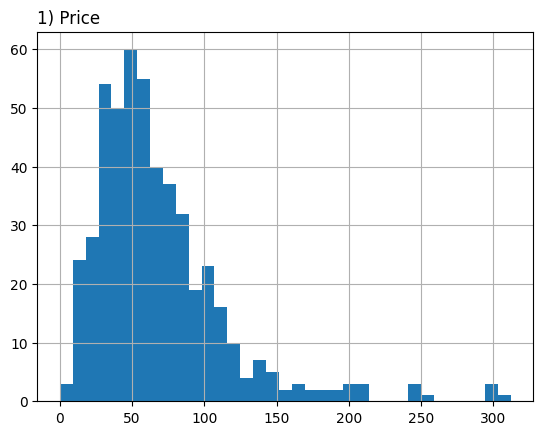

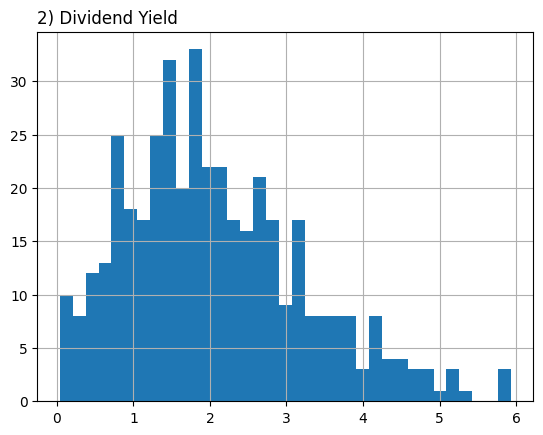

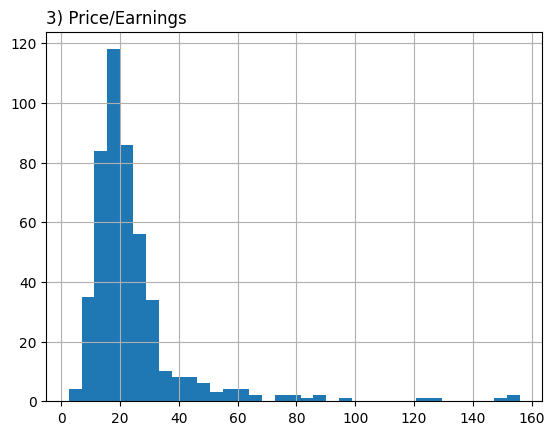

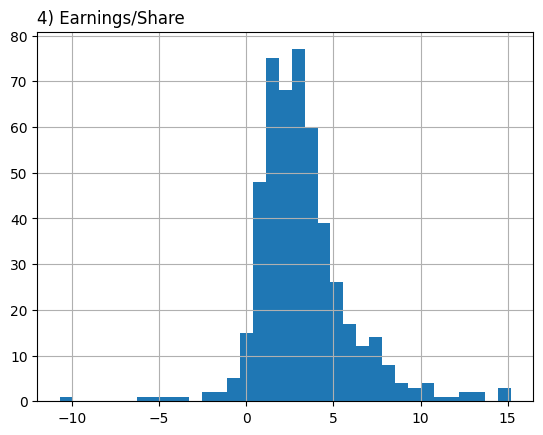

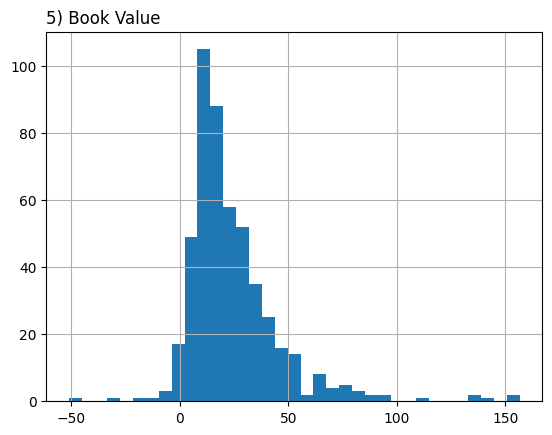

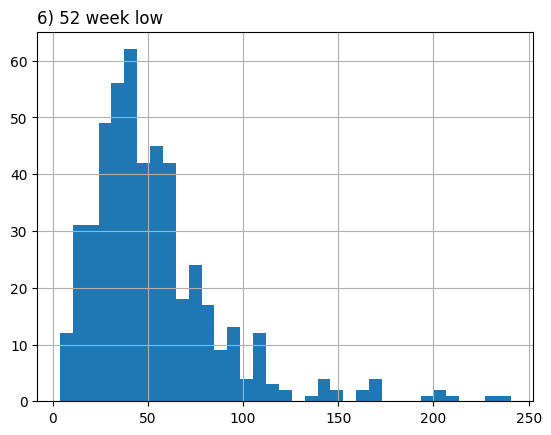

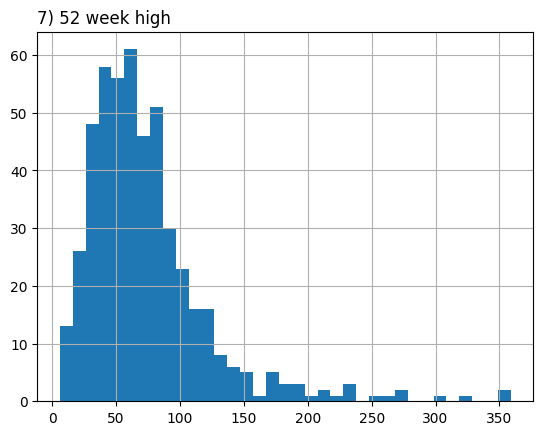

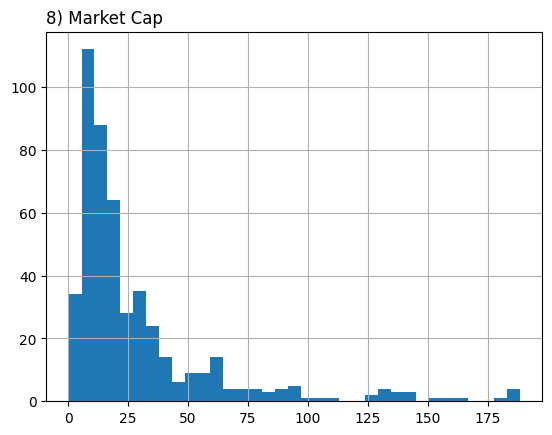

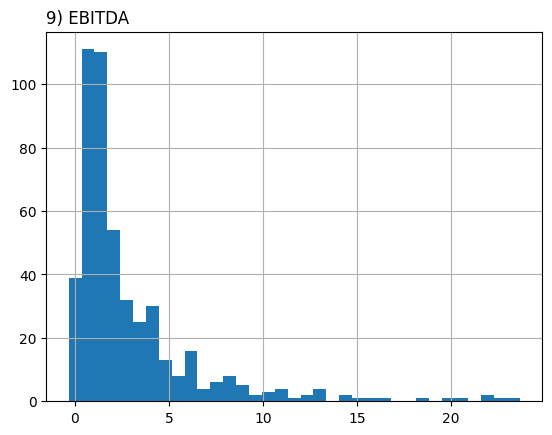

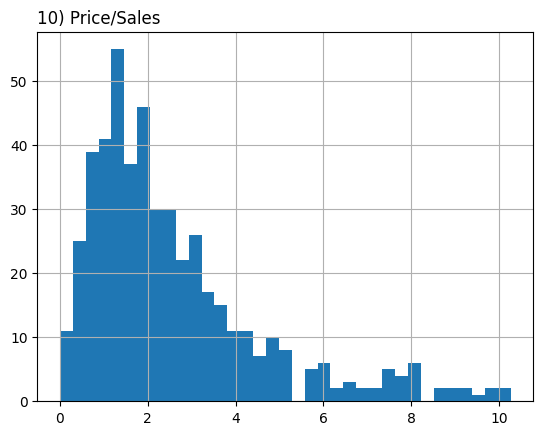

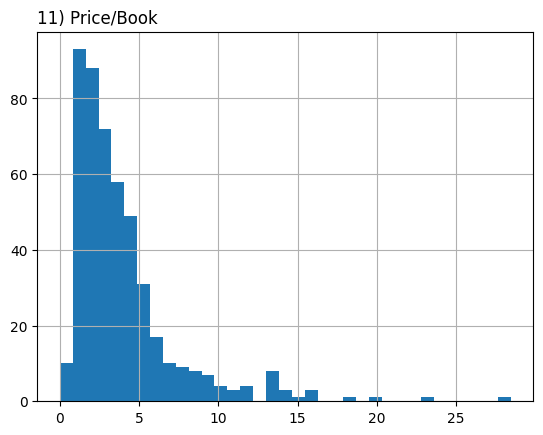

In [7]:
count = 0
for columnName in numericClolumns:
    if columnName == '': continue
    fig = plt.figure
    count += 1
    bins = 35
    
    counts, bins = np.histogram(ruleOf3std(data[columnName]), bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
    plt.hist(bins[:-1], bins, weights=counts)
    #dataFrame = pd.DataFrame(data = data[columnName])
    #dataFrame.plot.kde()
    plt.title(f'{count}) {columnName}', loc='left')
    plt.grid(True)
    plt.show()

In [8]:
data.fillna(0, inplace=True)
print(data.isnull().sum())
data.describe().T

Symbol            0
Name              0
Sector            0
Price             0
Dividend Yield    0
Price/Earnings    0
Earnings/Share    0
Book Value        0
52 week low       0
52 week high      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Price,500.0,77.368600,87.596940,0.0000,38.745000,58.3550,86.68000,1197.1200
Dividend Yield,500.0,1.807460,1.437377,0.0000,0.782500,1.6500,2.63500,10.6400
Price/Earnings,500.0,28.692280,68.992656,0.0000,14.692500,19.7500,25.92250,1329.6200
Earnings/Share,500.0,3.557712,4.048577,-10.6930,1.650000,2.8405,4.43200,41.7270
Book Value,500.0,301.008078,6189.531302,-51.2750,10.812500,19.0390,31.33325,138425.4531
52 week low,500.0,59.086605,62.273443,0.0000,30.930000,45.6050,66.49000,787.0000
52 week high,500.0,84.498947,98.968906,0.0000,42.315000,63.4900,91.02750,1378.9600
Market Cap,500.0,35.065737,54.709813,0.0000,9.586000,17.3390,34.61775,529.0000
EBITDA,500.0,3.692963,6.664391,-0.3313,0.865375,1.6255,3.79275,60.6570
Price/Sales,500.0,2.760100,2.531510,0.0000,1.207500,1.9950,3.35250,17.8400


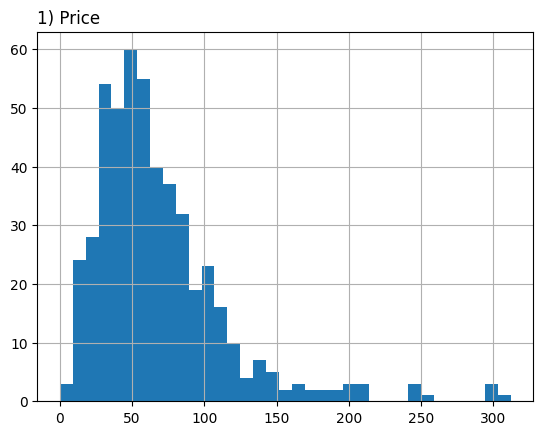

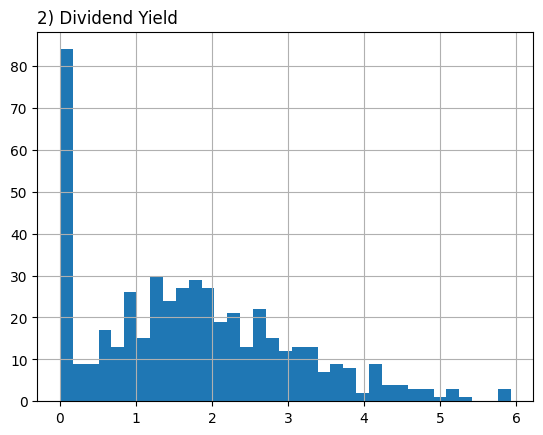

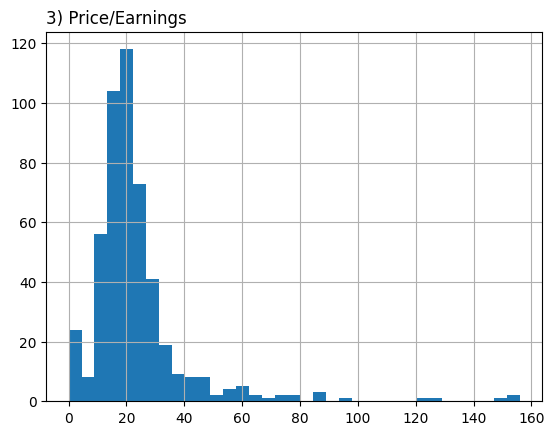

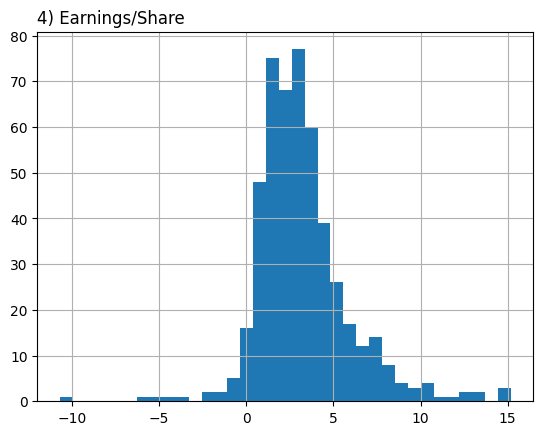

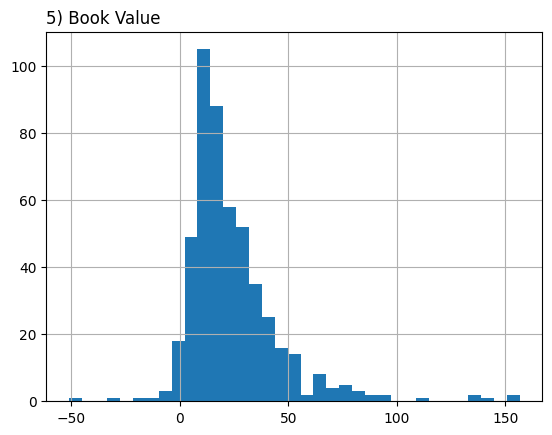

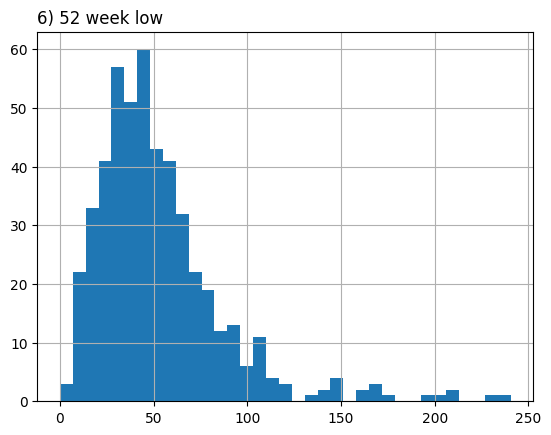

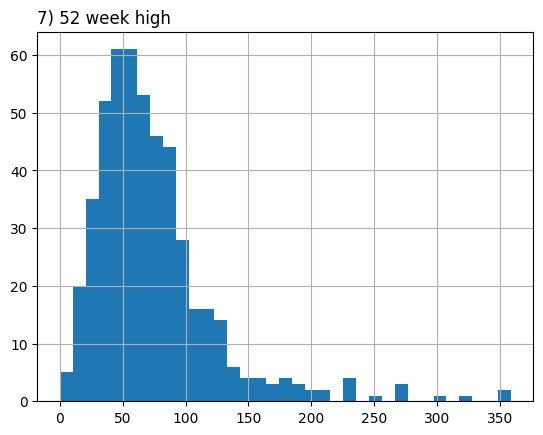

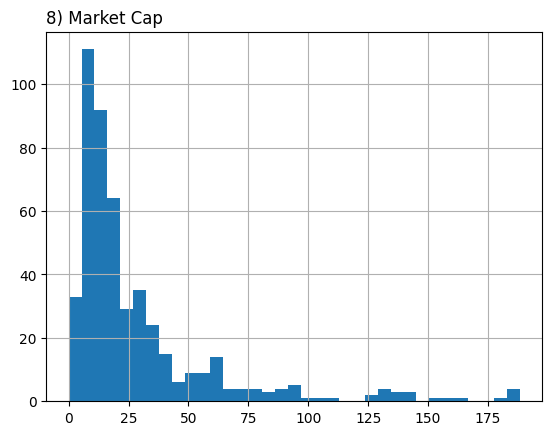

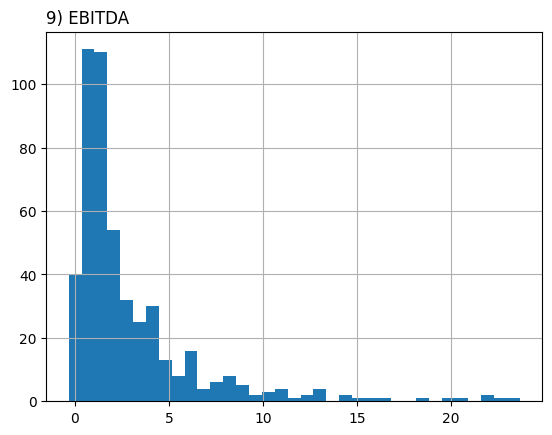

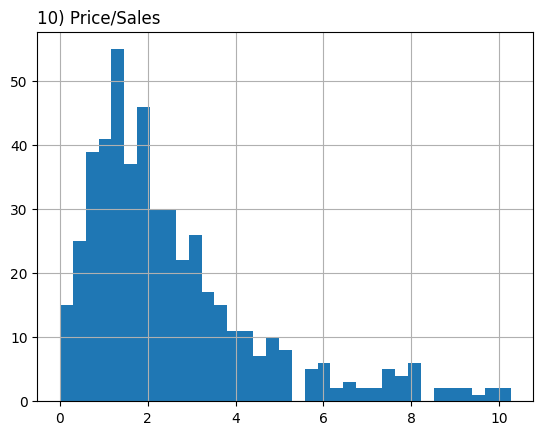

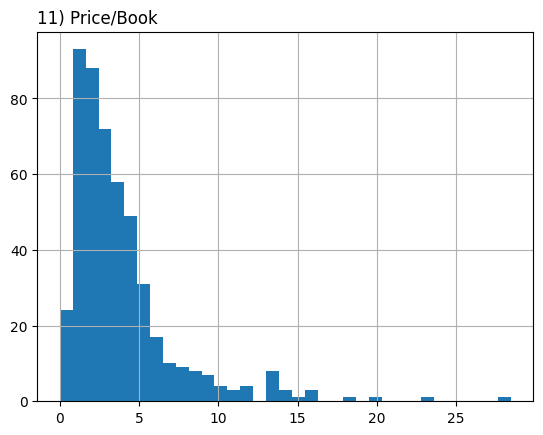

In [9]:
def makeFigure():
    while len(numericClolumns) < i*j:
        numericClolumns.append('')
    figureAxesNames = np.reshape(numericClolumns, (i,j))
    fig = plt.figure(figsize=(i,j), layout='constrained')
    fig ,axs = plt.subplot_mosaic(figureAxesNames)
    for label, ax in axs.items():
        #print(f'"{label}"')
        if label == '': continue
        counts, bins = np.histogram(data[label], bins=30)
        ax.hist(bins[:-1], bins, weights=counts)
        ax.set_title(label, loc='left')

count = 0
for columnName in numericClolumns:
    if columnName == '': continue
    fig = plt.figure
    count += 1
    bins = 35
    
    counts, bins = np.histogram(ruleOf3std(data[columnName]), bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(f'{count}) {columnName}', loc='left')
    plt.grid(True)
    plt.show()


In [10]:
# обновляем данные с диска
data = pd.read_csv(path)
for columnName in numericClolumns:
    data[columnName].fillna(data[columnName].mean(), inplace=True)
data.head(10)

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Co.,Industrials,141.14,2.120000,20.330000,6.900,26.668,107.15,143.37,92.345,8.1210,2.95,5.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,39.60,1.820000,25.930000,1.529,15.573,32.70,40.49,59.477,4.3590,2.74,2.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie Inc.,Health Care,53.95,3.020000,20.870000,2.570,2.954,40.10,54.78,85.784,7.1900,4.48,18.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ACN,Accenture,Information Technology,79.79,2.340000,19.530000,4.068,8.326,69.00,85.88,50.513,4.4230,1.75,9.54,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACE,ACE Limited,Financials,102.91,2.210000,10.000000,10.293,86.897,84.73,104.07,34.753,4.2750,1.79,1.18,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ACT,Actavis Inc,Health Care,213.77,2.131439,29.887792,-3.597,55.188,118.68,230.77,37.291,2.4770,3.93,3.85,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,ADBE,Adobe Systems Inc,Information Technology,64.30,2.131439,121.440000,0.520,13.262,41.91,71.11,32.004,0.7525,7.77,4.76,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,AES,AES Corp,Utilities,13.61,1.320000,29.887792,-0.040,5.781,11.17,15.54,9.872,4.2910,0.62,2.37,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AET,Aetna Inc,Health Care,76.39,1.130000,13.290000,5.681,40.021,57.72,76.71,27.302,4.7370,0.52,1.89,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AFL,AFLAC Inc,Financials,61.31,2.360000,9.580000,6.459,34.527,54.02,67.62,27.844,4.7130,1.21,1.79,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [11]:
print(data.isnull().sum())
data.describe().T

Symbol            0
Name              0
Sector            0
Price             0
Dividend Yield    0
Price/Earnings    0
Earnings/Share    0
Book Value        0
52 week low       0
52 week high      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Price,500.0,77.368600,87.596940,0.0000,38.74500,58.355000,86.68000,1197.1200
Dividend Yield,500.0,2.131439,1.216265,0.0400,1.35000,2.131439,2.63500,10.6400
Price/Earnings,500.0,29.887792,68.743115,2.5200,15.86750,20.480000,27.99500,1329.6200
Earnings/Share,500.0,3.564842,4.045437,-10.6930,1.65300,2.860500,4.43200,41.7270
Book Value,500.0,301.611301,6189.516604,-51.2750,10.84625,19.099000,31.52475,138425.4531
52 week low,500.0,59.205015,62.217129,3.8000,31.00750,45.650000,66.49000,787.0000
52 week high,500.0,84.668283,98.896445,6.1000,42.58000,63.570000,91.02750,1378.9600
Market Cap,500.0,35.348525,54.618931,0.2085,9.87150,17.540000,35.02575,529.0000
EBITDA,500.0,3.700364,6.662336,-0.3313,0.86870,1.638000,3.79275,60.6570
Price/Sales,500.0,2.782359,2.519322,0.0000,1.22000,2.015000,3.35250,17.8400


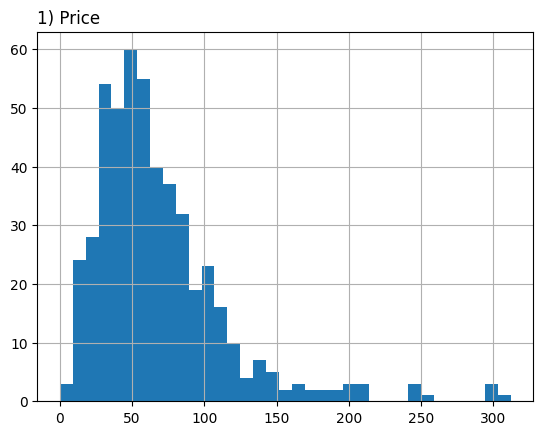

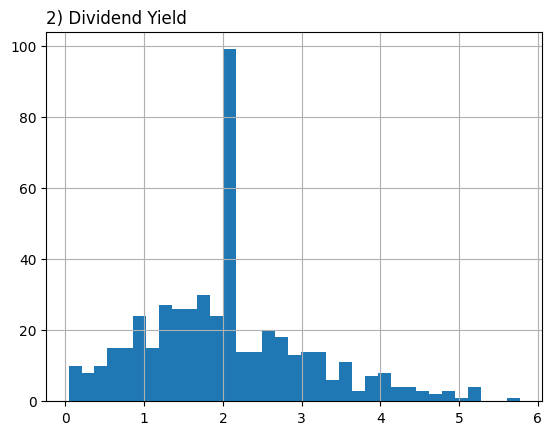

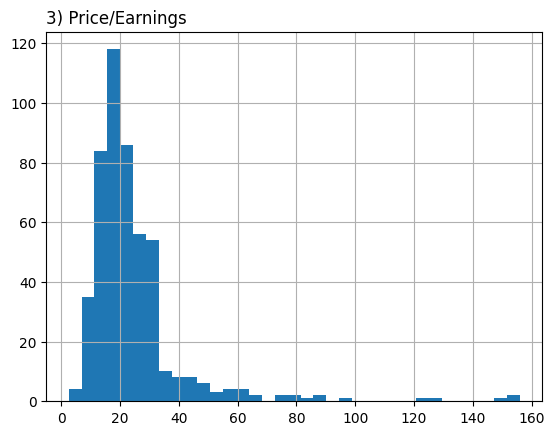

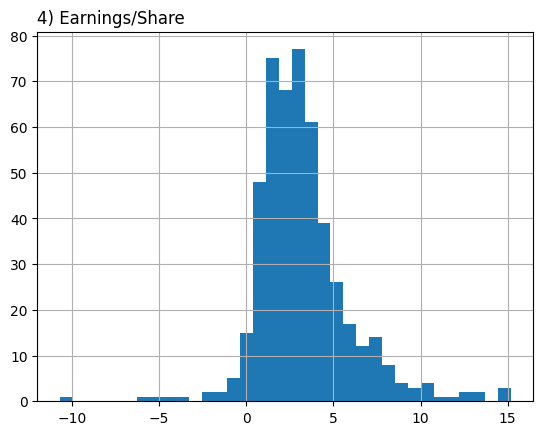

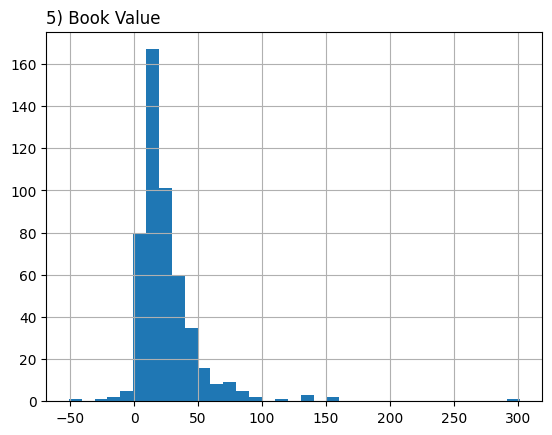

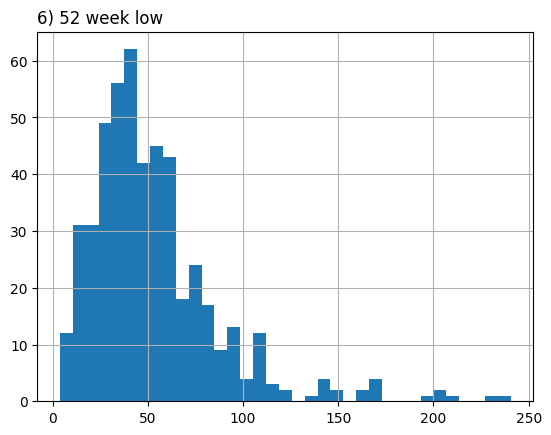

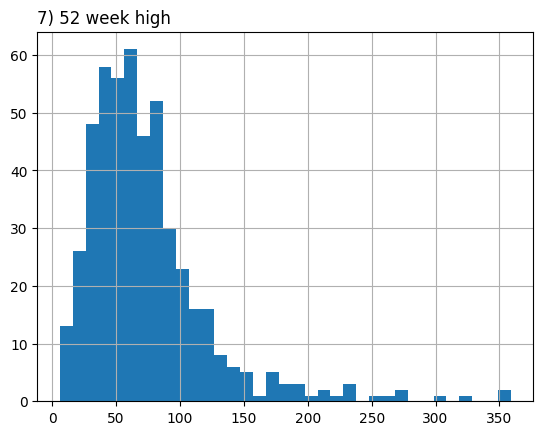

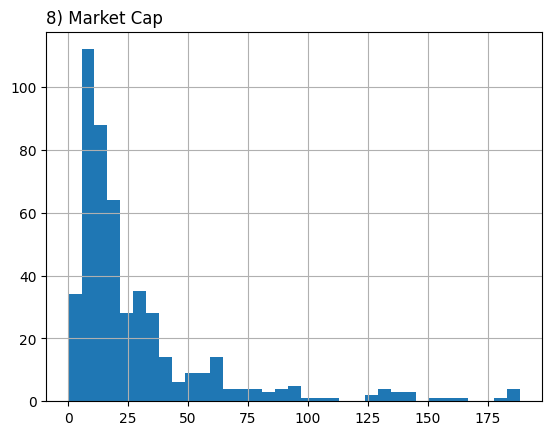

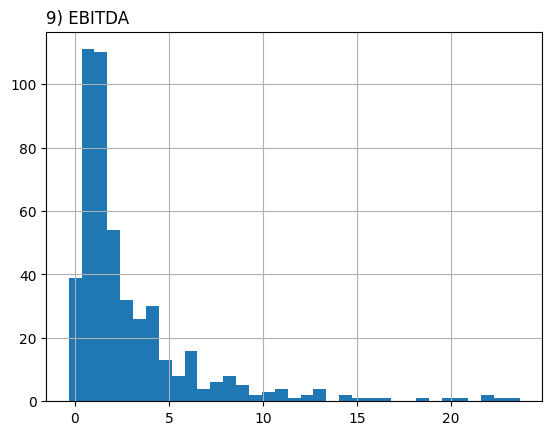

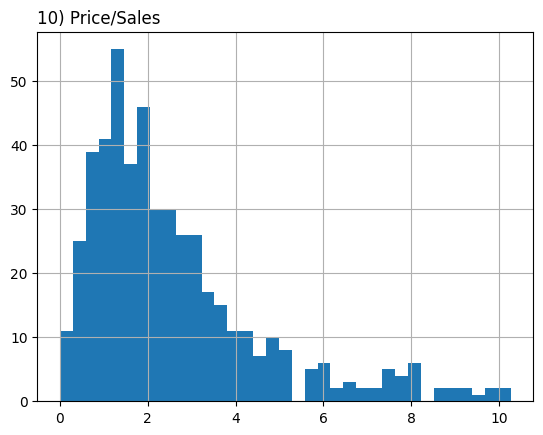

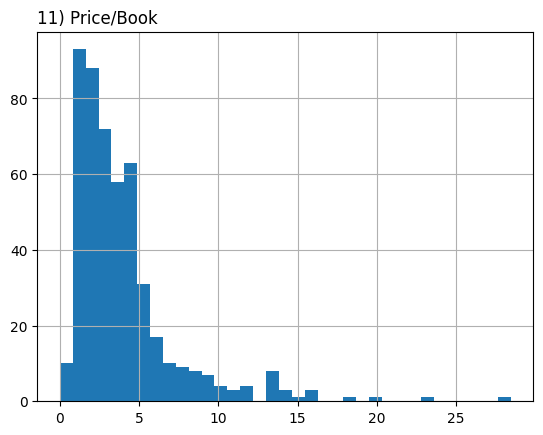

In [12]:
count = 0
for columnName in numericClolumns:
    if columnName == '': continue
    fig = plt.figure
    count += 1
    bins = 35
    
    counts, bins = np.histogram(ruleOf3std(data[columnName]), bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
    plt.hist(bins[:-1], bins, weights=counts)
    #dataFrame = pd.DataFrame(data = data[columnName])
    #dataFrame.plot.kde()
    plt.title(f'{count}) {columnName}', loc='left')
    plt.grid(True)
    plt.show()